# Analyse exploratoire - Catégorisez automatiquement des questions

## Introduction

Nous allons dans cette étude proposez une analyse textuelle des questions posées sur le site stackoverflows. Notre objectif à terme est de proposer un taggage automatique des questions pour aider les débutants dans leurs premiers pas sur le site.

## Récupération des données 

On va dans un premier temps récupérer les questions posées sur le site. Pour cela nous nous rendons sur le site https://data.stackexchange.com/stackoverflow/query/new. Il nous faut écrire une requête sql:

In [ ]:
SELECT Title, Body, Tags
From Posts
WHERE PostTypeId = 1
AND Id < 500000
AND Score >= 3

Nous choisissons simplement des questions. 

Nous chargeons le dataset obtenu.

In [1]:
import pandas as pd
df = pd.read_csv('Query.csv', encoding='latin-1')

Avant d'examiner le corpus, nous allons tout d'abord traiter le texte avec les opérations suivantes:
+ enlever les balises HTML
+ enlever les caractères qui ne sont pas des lettres
+ convertir les lettres en minuscule
+ 'stemmer' (prendre la racine du mot)
+ enlever les stopwords (les mots qui sont la base du language et qui ne portent pas d'informations)

On écrit donc la fonction

In [2]:
from bs4 import BeautifulSoup 
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer    
#defining the function that will be used to create the dictionnary
def review_to_words( raw_review ):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(raw_review).get_text() 
    #
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()      
    #
    # 4. Stem all the words
    ps = PorterStemmer()
    words = [ps.stem(word) for word in words]                       
    #
    # 5. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
    # 
    # 6. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    # 7. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words )) 

On passe chacune des review dans un stemmer. (Cette opération prends du temps nous l'avons sauvegardé le résultat dans un fichier)

In [ ]:
# Get the number of reviews based on the dataframe column size
num_reviews = body.size

# Initialize an empty list to hold the clean reviews
clean_train_reviews = []

for i in range( 0, num_reviews ):
    # Call our function for each one, and add the result to the list of
    # clean reviews
    raw_text =  title.iloc[i].values[0] + ' ' +body.iloc[i].values[0]
    clean_train_reviews.append( review_to_words(raw_text) )

## Analyse du corpus



In [1]:
import pickle

#Import du 
infile = open("clean_train_reviews.pyc",'rb')
clean_train_reviews = pickle.load(infile)
infile.close()

words = []
for review in clean_train_reviews:
     words += review.split()


from collections import Counter
import numpy as np
freq_totale = Counter(words)
mostcommon = np.array(freq_totale.most_common())
x = mostcommon[:,1].astype(int)

Combien de mots différents dans notre corpus?

In [16]:
len(mostcommon)

209178

La distribution du nombre de fois que les mots apparaissent:

[]

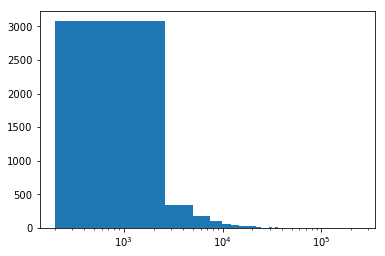

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(x[x > 200], bins = 100)
plt.semilogx()

Qui sont les mots les plus fréquents?

In [18]:
print(mostcommon[:50,0])

['thi' 'use' 'file' 'like' 'c' 'get' 'code' 'class' 'would' 'way' 'work'
 'ani' 'string' 'new' 'want' 'name' 'valu' 'one' 'tri' 'function' 'need'
 'object' 'set' 'user' 'data' 'type' 'return' 'applic' 'creat' 'doe' 'java'
 'x' 'method' 'id' 'know' 'public' 'test' 'error' 'ha' 'time' 'run' 'call'
 'net' 'system' 'server' 'int' 'list' 'make' 'exampl' 'window']


Populating the interactive namespace from numpy and matplotlib


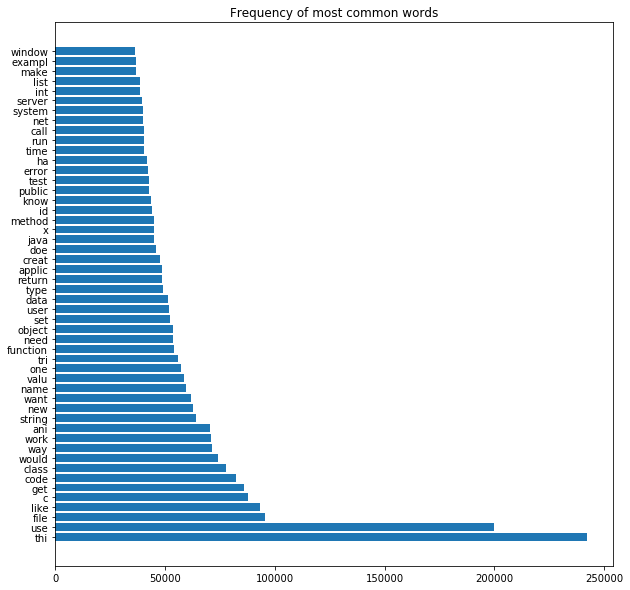

In [20]:
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 10)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()    
plt.barh(range(0,50), width=mostcommon[:50,1].astype(int))

ax.set_yticks(range(0,50))
ax.set_yticklabels(mostcommon[:50, 0], minor=False)
plt.title('Frequency of most common words')

Il nous reste des mots du language commun comme: 'want, 'way', 'work'... mais la plupart des mots correspondent tout de même à une indication sur la nature du document: 'data', 'user', 'java', 'system', 'server'

Nous allons construire une matrice de type bag of words mais pour cela il nous faut voir combien de mots nous avons envie de prendre en compte.

In [19]:
print(mostcommon[950:1000,0])

['cursor' 'cross' 'advantag' 'describ' 'crash' 'silverlight' 'bottom'
 'multi' 'margin' 'zero' 'graph' 'inner' 'leav' 'high' 'obviou' 'third'
 'xs' 'sp' 'cpu' 'hold' 'translat' 'assert' 'launch' 'xp' 'navig' 'advic'
 'unabl' 'outsid' 'embed' 'sound' 'accomplish' 'interact' 'parser' 'inject'
 'resiz' 'mous' 'ptr' 'focu' 'align' 'parti' 'bash' 'mock' 'uri' 'pair'
 'zip' 'recurs' 'math' 'typeof' 'evalu' 'graphic']


Populating the interactive namespace from numpy and matplotlib


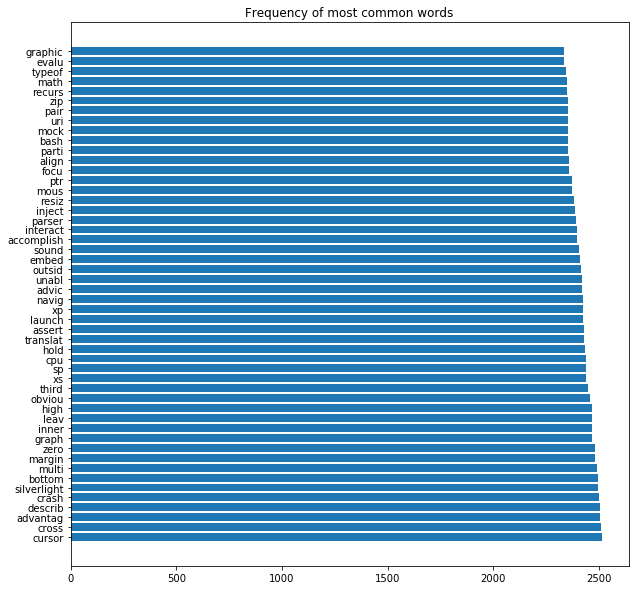

In [21]:
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 10)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()    
plt.barh(range(0,50), width=mostcommon[950:1000,1].astype(int))

ax.set_yticks(range(0,50))
ax.set_yticklabels(mostcommon[950:1000, 0], minor=False)
plt.title('Frequency of most common words')

On voit déjà que ces mots ne sont pas assez descriptifs de la technologie ou du typ de question posé.

In [22]:
print(mostcommon[350:400,0])

['far' 'correct' 'standard' 'group' 'ask' 'folder' 'machin' 'thought'
 'assembl' 'locat' 'insid' 'block' 'last' 'context' 'must' 'miss' 'record'
 'statement' 'tell' 'place' 'someon' 'loop' 'via' 'comment' 'microsoft'
 'replac' 'featur' 'avail' 'ie' 'td' 'v' 'initi' 'std' 'height' 'either'
 'cach' 'practic' 'linux' 'note' 'approach' 'task' 'learn' 'password'
 'figur' 'background' 'non' 'caus' 'parent' 'consol' 'config']


Populating the interactive namespace from numpy and matplotlib


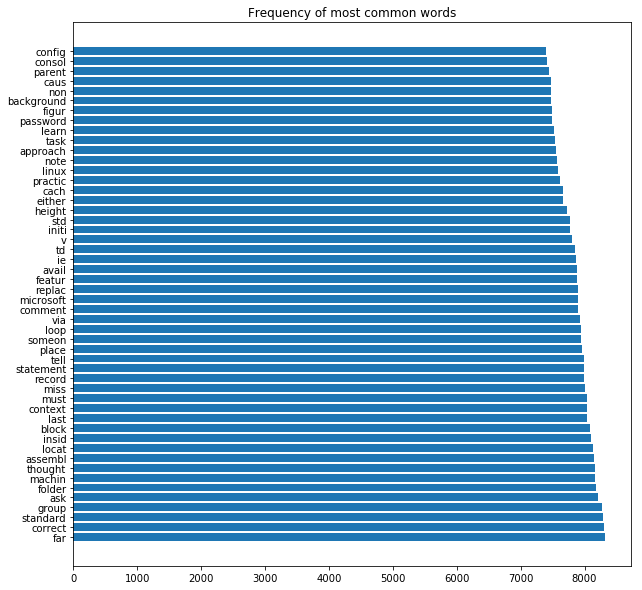

In [23]:
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 10)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()    
plt.barh(range(0,50), width=mostcommon[350:400,1].astype(int))

ax.set_yticks(range(0,50))
ax.set_yticklabels(mostcommon[350:400, 0], minor=False)
plt.title('Frequency of most common words')

On voit ici déjà plus de mots qui vont nous permettre de taguer nos documents.

Si on va un peu plus loin:

In [22]:
print(mostcommon[650:700,0])

['gui' 'commun' 'play' 'regular' 'txt' 'combin' 'frame' 'exit' 'uniqu'
 'primari' 'track' 'variou' 'optim' 'deleg' 'purpos' 'regist' 'produc'
 'hit' 'past' 'reflect' 'vb' 'mac' 'author' 'layer' 'lang' 'split' 'later'
 'val' 'usual' 'obvious' 'cooki' 'rel' 'io' 'sun' 'mail' 'abstract' 'guid'
 'often' 'tutori' 'maven' 'mention' 'hi' 'queue' 'q' 'delphi' 'associ'
 'easili' 'nhibern' 'gcc' 'master']


Populating the interactive namespace from numpy and matplotlib


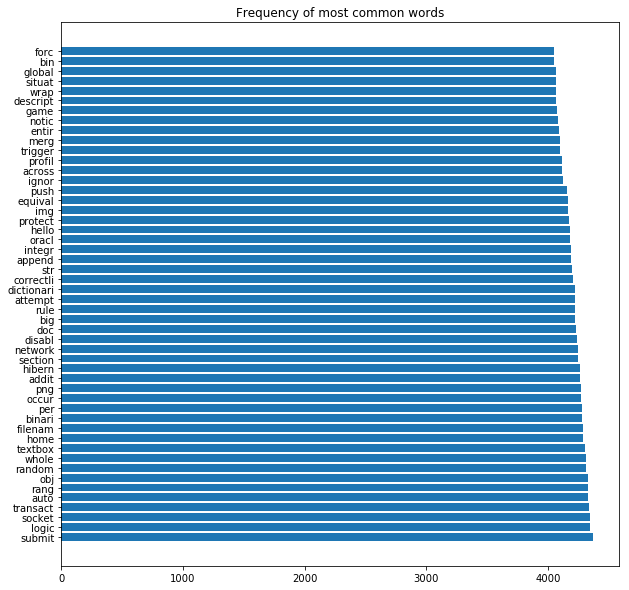

In [24]:
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 10)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()    
plt.barh(range(0,50), width=mostcommon[650:700,1].astype(int))

ax.set_yticks(range(0,50))
ax.set_yticklabels(mostcommon[650:700, 0], minor=False)
plt.title('Frequency of most common words 650 to 700')

On voit beaucoup moins de mots significatifs ici.

On va donc s'arrêter à 400 mots pour notre représentation bag of words. Cela permet également limité nos calculs: nous ne voulons pas choisir un nombre trop grand sous peine de complexifier les calculs lors de la classification supervisée ou non.

Nous allons également la distribution des mots les plus présents dans les documents: la fréquence des mots dans les documents.


Populating the interactive namespace from numpy and matplotlib


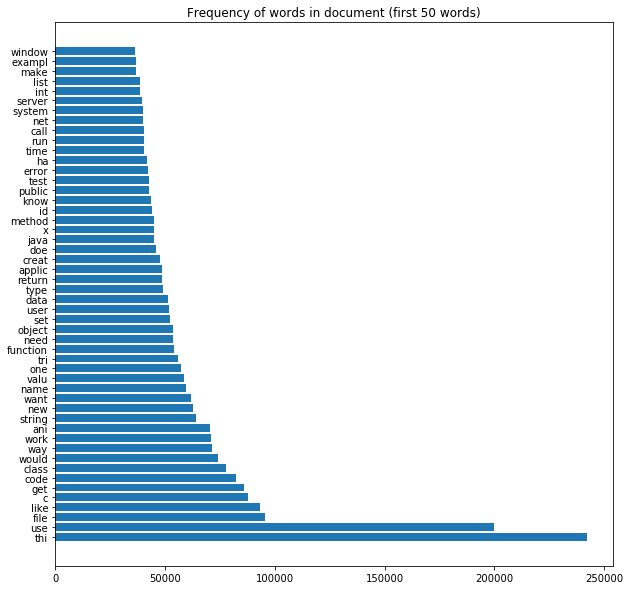

In [4]:
import pickle 

infile = open("clean_train_reviews.pyc",'rb')
clean_train_reviews = pickle.load(infile)
infile.close()


from collections import defaultdict

DF = defaultdict(int) 
for review in clean_train_reviews:
    for word in  review.split():
            DF[word] += 1 

df = []
for word in DF:
    df.append([word, DF[word]]) 
import numpy as np
df = np.array(df)
df = df[(-df[:,1].astype(int)).argsort()]

%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 10)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()    
plt.barh(range(0,50), width=df[:50,1])

ax.set_yticks(range(0,50))
ax.set_yticklabels(df[:50, 0], minor=False)
plt.title('Frequency of words in document (first 50 words)')

On voit que la fréquence des mots dans les documents correspond beaucoup à la fréquence des mots (la distribution est la même). On peut tout de suite comprendre que l'apport de cette nouvelle information ne va pas nous aider beaucoup.


## Représentation Bag Of Words

### Tf

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 400) 
train_data_features = vectorizer.fit_transform(clean_train_reviews)
train_data_features = train_data_features.toarray()
vocab = vectorizer.get_feature_names()
df_tf = pd.DataFrame(train_data_features, columns = vocab)

### Tf-idf

In [ ]:
from collections import defaultdict
import math

DF = defaultdict(int) 
for review in clean_train_reviews:
    for word in review:
        DF[word] += 1 


In [1]:
import pickle

#Import des documents cleanés
infile = open("clean_train_reviews.pyc",'rb')
clean_train_reviews = pickle.load(infile)
infile.close()

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=400)
values = tfidf.fit_transform(clean_train_reviews)

In [7]:
import pandas as pd
df_tf_idf = pd.DataFrame(values.todense(), columns = tfidf.get_feature_names())

## Conclusion

Nous avons créer notre matrice de représentations de nos documents. Il s'agit d'une représentation bag of words. Nous allons pour le moment nous contenter de cette représentation et par la suite réévaluer si celle-ci suffit pour construire des tags qui sont pertinents ou si l'on a besoin d'une représentation plus précise tel que tf-idf qui pourrait potentiellement nous apporter plus de précision pour construire notre taguage automatique.

In [25]:
df_tf.to_csv('BOW.csv')
df_tf_idf.to_csv('Tf_idf.csv')